In [2]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

#getting details automatically from files
import glob
import csv
import pandas as pd
import time
import datetime

#saving data 
import pickle

import mdtraj as md

from MDPlus import fastfitting

In [3]:
# functions for saving (pickling) and loading data 

def save_object(obj, filename, atm, folder):
    with open(atm+folder+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def load_object(filename, atm, folder):
    with open(atm+folder+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        #pickle.load(obj, datainput, pickle.HIGHEST_PROTOCOL)
        print filename, " is now loaded"
        #print obj.shape
        return k;

dermsd_index_list.pkl  is now loaded
dermsd_values_list.pkl  is now loaded
dermsd_data_list.pkl  is now loaded
 
CA_1187409s_pdb1.pdb
The closest match to the target was snapshot 8115 with rmsd 0.64 angstroms
 
CA_1187409s_pdb2.pdb
The closest match to the target was snapshot 40364 with rmsd 0.56 angstroms
 
CA_1187409s_pdb3.pdb
The closest match to the target was snapshot 82735 with rmsd 0.88 angstroms
 
CA_1187409s_pdb4.pdb
The closest match to the target was snapshot 53123 with rmsd 0.50 angstroms
 
CA_1187409s_pdb5.pdb
The closest match to the target was snapshot 66225 with rmsd 0.00 angstroms
(103125, 58, 3)


/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log
/home/feb23/.local/lib/python2.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: divide by zero encountered in log


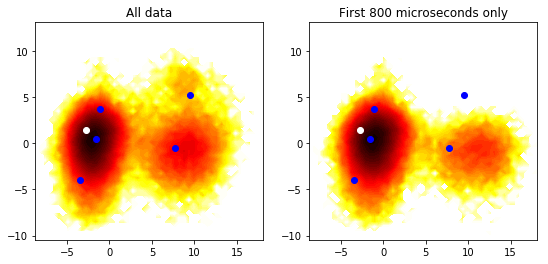

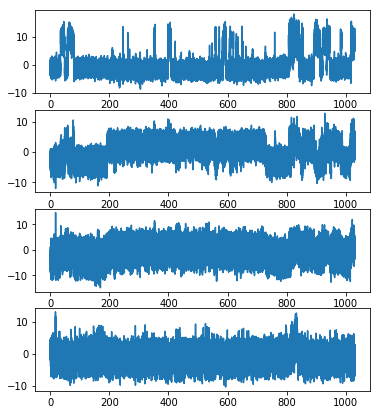

In [4]:
deshaw_pdb_workingdir = '/home/feb23/Documents/jha/extasy/bpti/protein_pdb'
de_string='/home/feb23/Documents/jha/extasy/bpti/extasy-bpti/Shaw_Data_Analysis/'

# note - takes 11 min to run on my laptop

do_de_rmsd=0
if do_de_rmsd==1:
    # calculated RMSD from c (de shaw traj) data with 5 pdb sturctures given by de shaw
    # this is good for testing and comparing values with our data 
    
    dermsd_index_list = []
    dermsd_values_list = []
    dermsd_data_list = []

    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        pdbload = deshaw_pdb_workingdir +'/'+pdb
        pdb_obj = md.load(pdbload, top)
        print type(pdb_obj)
        po_fasu = Fasu(pdb_obj)
        print type(po_fasu)
        po_cofasu = Cofasu(po_fasu)
        print type(po_cofasu)
        print po_cofasu.shape
        print c.shape
        target_structure = po_cofasu[0]
        dermsds = fastfitting.rmsd_traj(c, target_structure)
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(dermsds), dermsds.min())
        #dermsd_list.append(dermsds)
        dermsd_index_list.append(np.argmin(dermsds))
        dermsd_values_list.append(dermsds.min())
        dermsd_data_list.append(dermsds)

    # save results for loading later ( takes about 11 min to run on laptop)
    filename = 'dermsd_index_list.pkl'
    save_object(dermsd_index_list,filename,de_string,'')

    filename = 'dermsd_values_list.pkl'
    save_object(dermsd_values_list,filename,de_string,'')

    filename = 'dermsd_data_list.pkl'
    save_object(dermsd_data_list,filename,de_string,'')

else:
    
    # load results for use in other places later on 
    filename = 'dermsd_index_list.pkl'
    dermsd_index_list = load_object(filename,de_string,'')

    filename = 'dermsd_values_list.pkl'
    dermsd_values_list = load_object(filename,de_string,'')

    filename = 'dermsd_data_list.pkl'
    dermsd_data_list = load_object(filename,de_string,'') 
    
    
    for i in range(1,6):
        pdb = 'CA_1187409s_pdb{}.pdb'.format(str(i))
        print " "
        print pdb
        print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(dermsd_index_list[i-1], dermsd_values_list[i-1])
                      


            
            
            
# DE SHAW DATA

f = Fasu('../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca_1ms_dt10ns.xtc',
         top='../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb')#,selection='name CA') #note that analysis fails when use selection='name CA'
c = Cofasu(f)

print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

DE_plot = 1

if DE_plot == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
 
    
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # note sure why these plots come out flipped right to left compared to plots prof Laughton supplied 
    
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')

    
    # In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
    plt.figure(figsize=(6, 7))
    time = np.arange(len(c)) / 100.0
    plt.subplot(4,1,1)
    plt.plot(time, p.projs[0])
    plt.subplot(4,1,2)
    plt.plot(time, p.projs[1])
    plt.subplot(4,1,3)
    plt.plot(time, p.projs[2])
    plt.subplot(4,1,4)
    plt.plot(time, p.projs[3])

In [5]:
def set_up_vars(atm,folder):
    #path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
    path_to_zip = glob.glob(atm+folder+'rp*-pilot.0000')

    rpname="cow"
    zipfolder="cow"
    path=1
    pathSt="cow"
    pathCu ="cow"
    iters=1
    path_to_cu=1
    prj = 1
    if path_to_zip!=[]:
        rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
        zipfolder = rpname+ '-pilot.0000/'
        prj = folder + zipfolder
        path   = atm+prj
        pathSt = atm+prj+"staging"
        pathCu = atm+prj+"cu009"
        path_to_cu = glob.glob(atm+folder+zipfolder+"cu009/"+"min-*_9.log")
        iters = int(len(path_to_cu))+2-1 #need the -1 bec it failed before completion so counter is off
    return path_to_zip, rpname, zipfolder, path, pathSt, pathCu, iters, path_to_cu, prj; 


#########################################

def count_files(atm,folder,zipfolder):
    #print " "
    #print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
    #print path_to_cu
    #print len(path_to_cu)
    num_minlog = int(len(path_to_cu)) #need the -1 bec it failed before completion so counter is off
    #print "min log = ", num_minlog
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"eq-*_9.log")
    num_eqlog = int(len(path_to_cu))
    #print "eq log =", num_eqlog
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"md-*_1.xtc")
    num_xtc = int(len(path_to_cu))
    #print "num_xtc = ", num_xtc
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"min-*_1.gro")
    num_min_gro = int(len(path_to_cu))
    #print "min_gro files =", num_min_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"eq-*_1.gro")
    num_eq_gro = int(len(path_to_cu))
    #print "num_eq gro = ", num_eq_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"coco_out*_1.gro")
    num_coco_gro = int(len(path_to_cu))
    #print "num_coco gro = ", num_coco_gro
    return num_minlog, num_eqlog, num_xtc, num_min_gro, num_eq_gro, num_coco_gro;

def count_files(atm,folder,zipfolder,):
    #print " "
    #print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
    #print path_to_cu
    #print len(path_to_cu)
    num_minlog = int(len(path_to_cu)) #need the -1 bec it failed before completion so counter is off
    #print "min log = ", num_minlog
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"eq-*_9.log")
    num_eqlog = int(len(path_to_cu))
    #print "eq log =", num_eqlog
    #path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"md-*_1.xtc")
    path_to_cu = glob.glob(atm+folder+zipfolder+"zip.*/"+"staging/"+"md-*_1.xtc")
    #atm+folder+zipfolder+"zip.*/"+"staging/"+fileprefix+"*"
    num_xtc = int(len(path_to_cu))
    #print "num_xtc = ", num_xtc
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"min-*_1.gro")
    num_min_gro = int(len(path_to_cu))
    #print "min_gro files =", num_min_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"eq-*_1.gro")
    num_eq_gro = int(len(path_to_cu))
    #print "num_eq gro = ", num_eq_gro
    path_to_cu = glob.glob(atm+folder+zipfolder+"/staging/"+"coco_out*_1.gro")
    num_coco_gro = int(len(path_to_cu))
    #print "num_coco gro = ", num_coco_gro
    return num_minlog, num_eqlog, num_xtc, num_min_gro, num_eq_gro, num_coco_gro;

In [6]:
def which_top(atm,folder):
    #print " "
    #print "path to cu"
    path_to_cu = glob.glob(atm+folder+"inp_files/*.gro")
    #print path_to_cu
    cow=path_to_cu[0].split("/")
    top=cow[-1]
    #print top
    top=str(path_to_cu[0])
    #print top
    return top;

###################################################3
def get_gmxcoco_data(atm,folder):
    #print  "#              gmxcoco.wcfg details        #"
    wsplit = []
    path_to_gmxcoco=atm+folder+"/gmxcoco.wcfg"    
    e=open(path_to_gmxcoco,"r")
    #print e.readlines()
    w = e.readlines()
    e.close()
    gmxcocolines = [5, 7, 12, 28, 31  ]
    for i in range(len(gmxcocolines)):
        #print w[gmxcocolines[i]]
        #print w[gmxcocolines[i]].split()
        wsplit.append(w[gmxcocolines[i]].split())
    cu = int(wsplit[1][2])
    return cu, path_to_gmxcoco ; 

In [7]:
def run_fasu_tot(l,path,top,cu,iters,fileprefix,fileExt,offset=0):
    offset=0
    for i in range(0,iters):
        for k in range(cu):                
            string = path+"/"+fileprefix+"-"+str(i)+"_"+str(k)+fileExt
            ss = path+"/"
            if(fileprefix=="coco_out"):
                string = path+"/"+fileprefix+"_"+str(i)+"_"+str(k)+fileExt
            #str_list[i][k] = string
            #print string
            if(os.path.isfile(string)==True):
                #print string
                l[i][k] = Fasu(string,top=top, selection='name CA')
                #print l[i][k]
    #print l[-1][:]
    #print "END RUN FASU TOT"
    return l;

def plot_proj_on_deshaw(p,cow,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    p14 = []
    for i in range(len(cow)):
        p14.append(p.map(cow[i])[[0,3]])
    p14 = np.array(p14).T



In [8]:

def do_fasu(atm, folder, zipfolder, top, fileprefix):
    l_fas = []
    #path_to_file = glob.glob(atm+folder+zipfolder+"staging/"+fileprefix+"*")
    path_to_file = glob.glob(atm+folder+zipfolder+"zip.*/"+"staging/"+fileprefix+"*")

    for i in range(len(path_to_file)):
        cow = Fasu(path_to_file[i],top=top,selection='name CA')
        l_fas.append(cow)
    c_out = Cofasu(l_fas)
    return c_out;
###################################################

In [9]:
def check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top):   # check if need to DoCoFasu
    #fileExt = '.gro'
    #fileprefix = 'coco_out'
    coco_c="na"
    
    #print " check for DoCoFasu"
    #print " "
    filename = dirname+"_"+fileprefix+".pkl"
    checkForCoFasu = glob.glob(atm+folder+filename)
    #print checkForCoFasu
    if checkForCoFasu==[]:
        doCoFasu01=1
    elif rpname=="cow":
        doCoFasu01=2
    else:
        doCoFasu01 = 0
        #print filename, " exists"
        
        
    #print "1 - doCoFasu01 = ", doCoFasu01
    if rpname=="cow":
        #print "no zip files!"
        #print "no zip files!"
        doCoFasu01=2
    if path_to_zip==[]:
        #print "no zip files!"
        doCoFasu01=2
    
    #print " pathj to zip"
    #print "path_to_zip"
    #print path_to_zip
    #######################################################
    #print "2 - doCoFasu01 = ", doCoFasu01
    
    if doCoFasu01==1:
        #print "doing CoFasu01 Stuffs  this will take a while "
        coco_c = do_fasu(atm, folder, zipfolder, top, fileprefix)
        filename = dirname+"_"+fileprefix+".pkl"
        save_object(coco_c,filename,atm,folder)
        #print "saved new ", filename
    elif doCoFasu01==2:
        print " "
        #print " there is no zip here!"
        #print "skipping this dir"
    else:
        filename = dirname+"_"+fileprefix+".pkl"
        coco_c = load_object(filename,atm,folder)
    
    return coco_c;
    
    #if doCoFasu!=2:
        #del md_c

In [10]:
def plot_proj_on_deshaw(p,cow,folder,fileprefix,fileExt,it):
    title=folder+" "+fileprefix+"*"+fileExt+"   iters="+str(it)
    cap=title
    p14 = []
    for i in range(len(cow)):
        p14.append(p.map(cow[i])[[0,3]])
    p14 = np.array(p14).T
    
    #print p14.shape
    #print p14
    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    
    #z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    #DEshaw = [x,y,z]
    #F = -np.log(z)
    #extent = [x[0], x[-1], y[0], y[-1]]
    #plt.title('All data')
    #plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    #plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    plt.plot(p14[0][:],p14[1][:], 'bo') # starting structure

    #plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
    plt.show()
    return;

['/home/feb23/Documents/jha/extasy/bpti/atm_sync_02_from_atm/p12b01_left_d3_itrs48_k12_100_k34_1000', '/home/feb23/Documents/jha/extasy/bpti/atm_sync_02_from_atm/p12b02_left_d3_itrs48_k12_1000_k34_1000', '/home/feb23/Documents/jha/extasy/bpti/atm_sync_02_from_atm/p12b02_left_d3_itrs48_k12_1000_k34_100', '/home/feb23/Documents/jha/extasy/bpti/atm_sync_02_from_atm/p12b02_left_d3_itrs48_k12_100_k34_100']
 
p12b01_left_d3_itrs48_k12_100_k34_1000
 ###################################################
p12b01_left_d3_itrs48_k12_100_k34_1000_md.pkl  is now loaded


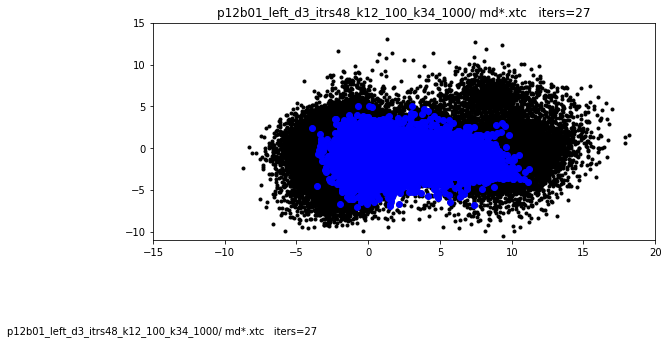

p12b01_left_d3_itrs48_k12_100_k34_1000_coco_out.pkl  is now loaded


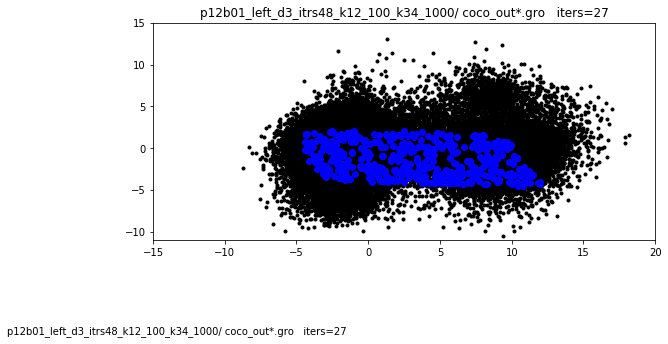

p12b01_left_d3_itrs48_k12_100_k34_1000_eq.pkl  is now loaded


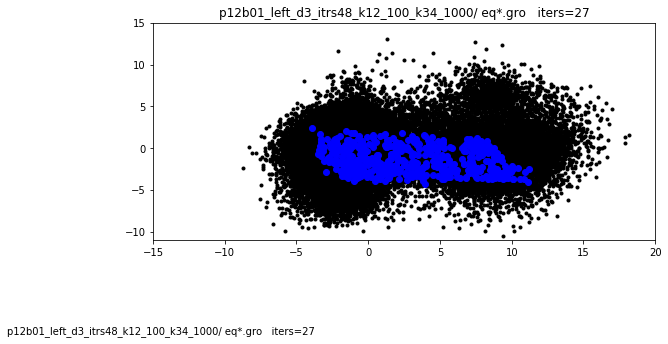

p12b01_left_d3_itrs48_k12_100_k34_1000_min.pkl  is now loaded


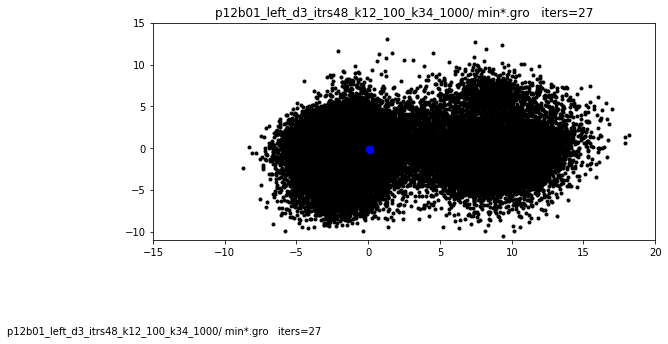

 
p12b02_left_d3_itrs48_k12_1000_k34_1000
 ###################################################
p12b02_left_d3_itrs48_k12_1000_k34_1000_md.pkl  is now loaded


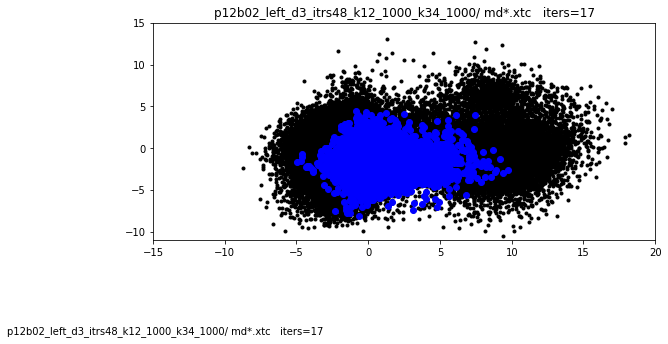

p12b02_left_d3_itrs48_k12_1000_k34_1000_coco_out.pkl  is now loaded


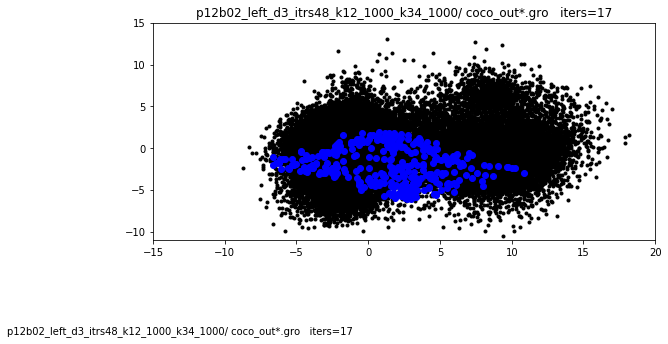

p12b02_left_d3_itrs48_k12_1000_k34_1000_eq.pkl  is now loaded


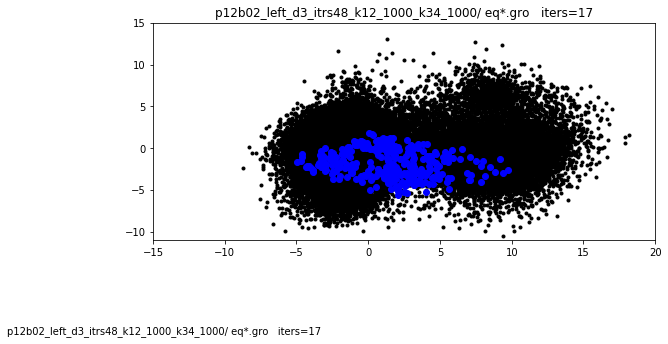

p12b02_left_d3_itrs48_k12_1000_k34_1000_min.pkl  is now loaded


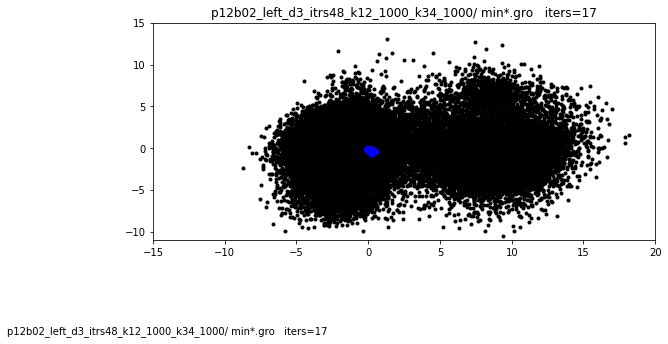

 
p12b02_left_d3_itrs48_k12_1000_k34_100
 ###################################################
p12b02_left_d3_itrs48_k12_1000_k34_100_md.pkl  is now loaded


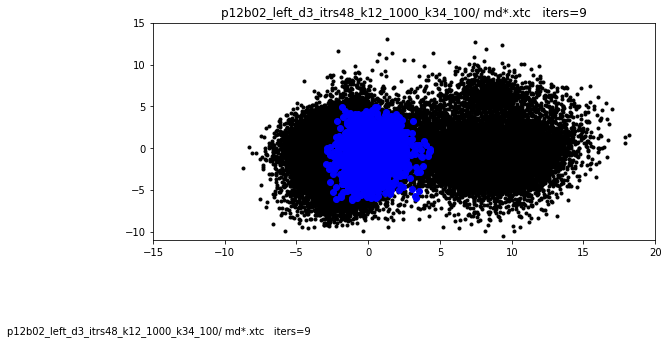

p12b02_left_d3_itrs48_k12_1000_k34_100_coco_out.pkl  is now loaded


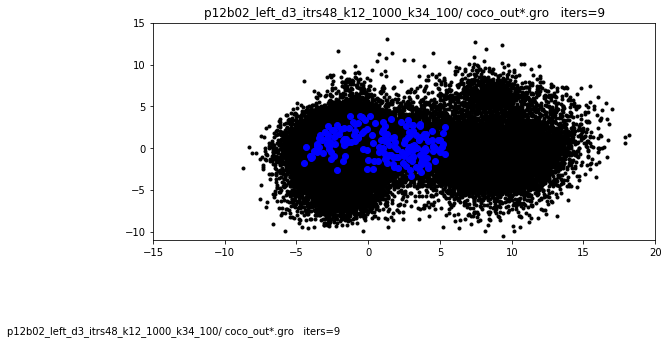

p12b02_left_d3_itrs48_k12_1000_k34_100_eq.pkl  is now loaded


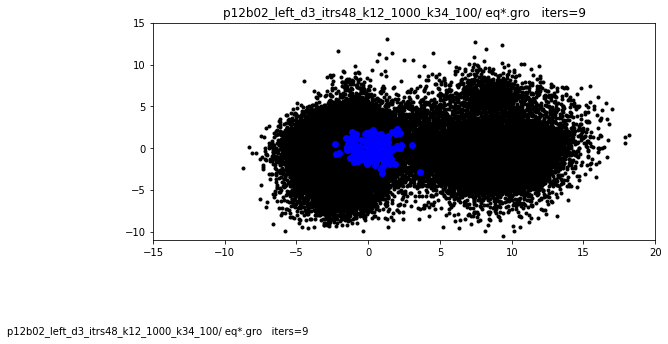

p12b02_left_d3_itrs48_k12_1000_k34_100_min.pkl  is now loaded


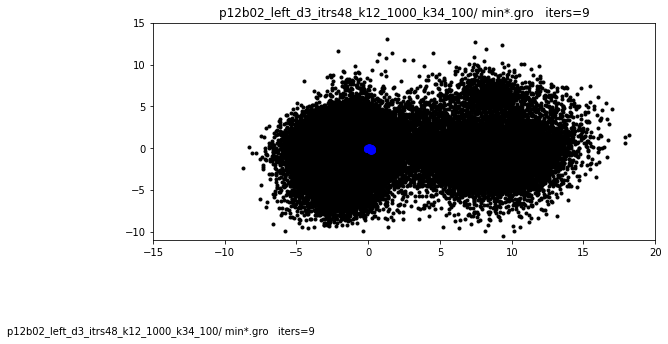

 
p12b02_left_d3_itrs48_k12_100_k34_100
 ###################################################
p12b02_left_d3_itrs48_k12_100_k34_100_md.pkl  is now loaded


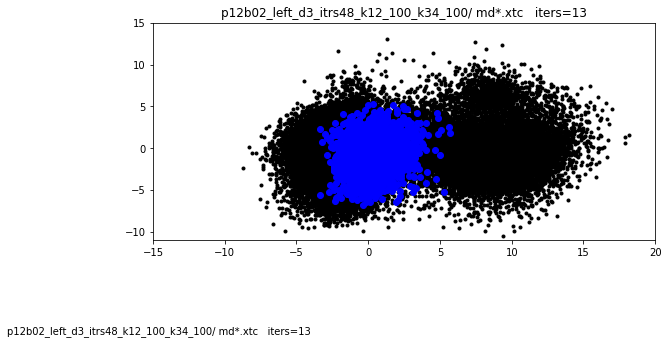

p12b02_left_d3_itrs48_k12_100_k34_100_coco_out.pkl  is now loaded


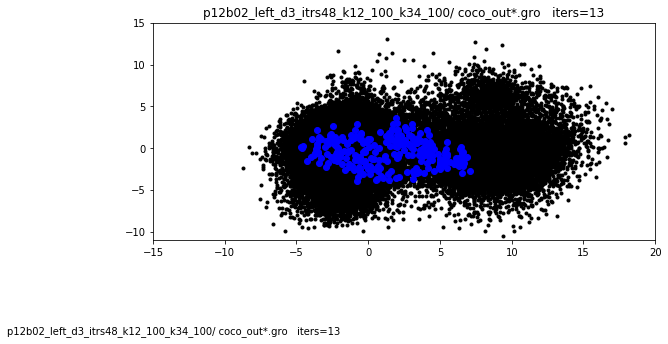

p12b02_left_d3_itrs48_k12_100_k34_100_eq.pkl  is now loaded


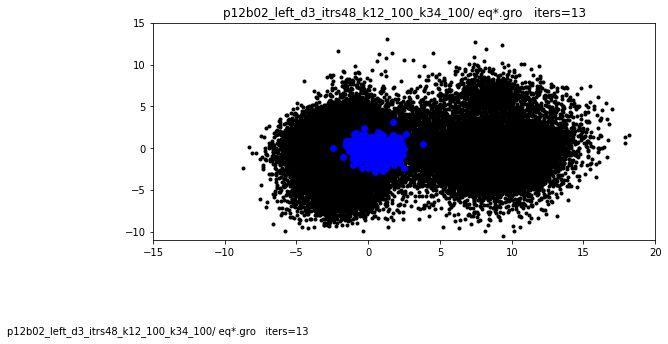

p12b02_left_d3_itrs48_k12_100_k34_100_min.pkl  is now loaded


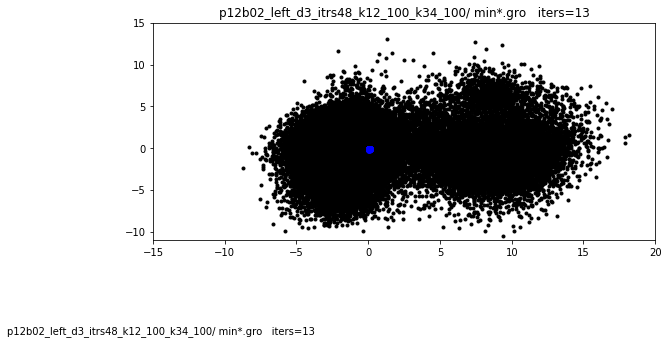

In [25]:
#dirlist = ["test_p07e01_k12_00100_k34_01000_itx2"]
atm = '/home/feb23/Documents/jha/extasy/bpti/atm_sync_02_from_atm/'

                        #p12b03_right_d3_itrs48_k12_100_k34_1000
dirlist = glob.glob(atm+"p12*left*d3*")

#dirlist = glob.glob(atm+"p*")

#dirlist = glob.glob(atm+"p12*_")

print dirlist

for i in range(len(dirlist)):
    dirname=dirlist[i].split("/")
    dirname=dirname[-1]
    print " "
    print dirname
    #print dirlist[i]
    #print " "
    doCoFasu = 0
    doRmsd=0
    folder = dirname+"/"
    #print folder
    reqe =6
    print " ###################################################"
    #print atm+folder+'rp*-pilot.0000'
    path_to_zip = glob.glob(atm+folder+'rp*-pilot.0000')
    #print path_to_zip
    path_to_zip, rpname, zipfolder,path,pathSt, pathCu, iters, path_to_cu, prj = set_up_vars(atm,folder)

    num_minlog, num_eqlog, num_xtc, num_min_gro, num_eq_gro, num_coco_gro = count_files(atm,folder,zipfolder)

    top = which_top(atm,folder)
    
    cu, path_to_gmxcoco = get_gmxcoco_data(atm, folder)

     # check if need to DoCoFasu
    fileExt = '.xtc'
    fileprefix = 'md'
    md_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    if md_c !="na":
        plot_proj_on_deshaw(p,md_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()
    
    fileExt = '.gro'
    fileprefix = 'coco_out'
    coco_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    if coco_c !="na":
        plot_proj_on_deshaw(p,coco_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()
    
    fileExt = '.gro'
    fileprefix = 'eq'
    eq_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    if eq_c !="na":
        plot_proj_on_deshaw(p,eq_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()
        
    fileExt = '.gro'
    fileprefix = 'min'
    min_c = check_n_load(fileExt,fileprefix,dirname,atm,rpname,zipfolder,top)
    
    if min_c !="na":
        plot_proj_on_deshaw(p,min_c,folder,fileprefix,fileExt,num_xtc)
        #plt.show()

In [ ]:
def plot_proj_on_deshaw(p,cow,folder,fileprefix,fileExt):
    title=folder+" "+fileprefix+"*"+fileExt
    
    p14 = []
    for i in range(len(cow)):
        p14.append(p.map(cow[i])[[0,3]])
    p14 = np.array(p14).T
    plt.figure(figsize=(9, 4))
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'wo') # starting structure
    #plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'bo')
